In [1]:
# Notebook details

In [2]:
def setup_notebook(fix_python_path=True, reduce_margins=True, plot_inline=True):
    if reduce_margins:
        # Reduce side margins of the notebook
        from IPython.core.display import display, HTML
        display(HTML("<style>.container { width:100% !important; }</style>"))

    if fix_python_path:
        # add egosocial to the python path
        import os, sys
        sys.path.extend([os.path.dirname(os.path.abspath('.'))])

    if plot_inline:
        # Plots inside cells
        %matplotlib inline
    
    global __file__
    __file__ = 'Notebook'

setup_notebook()

In [10]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import cm

import egosocial
from egosocial import config

BASE_DIR = os.path.join(egosocial.config.TMP_DIR, 'egocentric', 'results')

In [4]:
files = os.listdir(BASE_DIR)
files

['results_semantic_attributes.csv',
 'results_per_class_domain.csv',
 'results_per_class_domain_joint.csv',
 'results_per_class_domain_from_relation.csv',
 'results_domains.csv',
 'results_per_class_domain_semantic_attributes.csv',
 'results_relations.csv']

In [24]:
results = pd.read_csv(os.path.join(BASE_DIR, 'results_domains.csv'))
results[['Precision', 'Recall', 'Accuracy', 'F1-Score']] = results[['Precision', 'Recall', 'Accuracy', 'F1-Score']] / 100.0

In [25]:
results['Unnamed: 0'][results['Unnamed: 0'] == 'DOM-MT-TD-2'] = 'DOM-FROM-REL-MT-TD'

Notebook:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [27]:
results['Unnamed: 0'][results['Unnamed: 0'] == 'DOM-MT-I-2'] = 'DOM-FROM-REL-MT-I'

Notebook:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Text(0,0.5,'Precision')

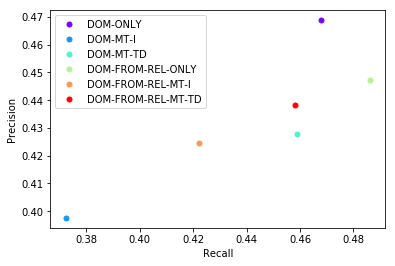

In [30]:
fig, ax = plt.subplots()

nrof_labels = len(results['Unnamed: 0'])
colors = cm.rainbow(np.linspace(0, 1, nrof_labels))     # create a bunch of colors

for i, point in results.iterrows():
    ax.plot(point['Recall'], point['Precision'], 'o', markersize=5, color=colors[i], linewidth=0.1, label=str(point['Unnamed: 0']))

plt.legend(loc='best')
plt.xlabel('Recall')
plt.ylabel('Precision')

Text(0,0.5,'F1-Score')

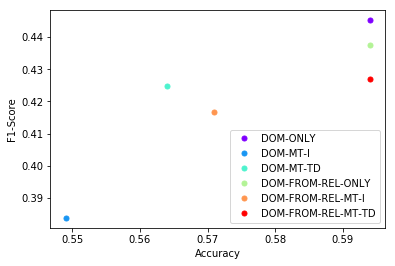

In [29]:
fig, ax = plt.subplots()

nrof_labels = len(results['Unnamed: 0'])
colors = cm.rainbow(np.linspace(0, 1, nrof_labels))     # create a bunch of colors

for i, point in results.iterrows():
    ax.plot(point['Accuracy'], point['F1-Score'], 'o', markersize=5, color=colors[i], linewidth=0.1, label=str(point['Unnamed: 0']))

plt.legend(loc='best')
plt.xlabel('Accuracy')
plt.ylabel('F1-Score')

In [84]:
results = pd.read_csv(os.path.join(BASE_DIR, 'results_per_class_domain_joint.csv'))
results

,Domain,Precision,Recall,F1-Score,Support
0,Attachent,0.4000,0.1667,0.2353,12
1,Coalitional Group,0.7742,0.7742,0.7742,31
2,Heirarchical Power,0.3333,0.3158,0.3243,19
3,Mating,0.1333,0.4000,0.2000,5
4,Reciprocity,0.7031,0.6818,0.6923,66
5,Attachent,0.3333,0.1667,0.2222,12
6,Coalitional Group,0.7188,0.7419,0.7302,31
7,Heirarchical Power,0.2500,0.2105,0.2286,19
8,Mating,0.1765,0.6000,0.2727,5
9,Reciprocity,0.7581,0.7121,0.7344,66


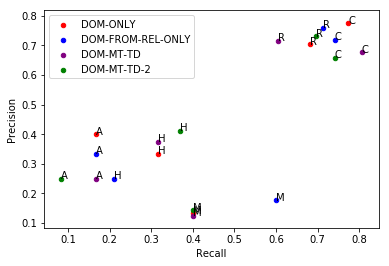

In [87]:
ax = results.iloc[:5].plot('Recall', 'Precision', kind='scatter', c='red', label='DOM-ONLY')
results.iloc[5:10].plot('Recall', 'Precision', kind='scatter', c='blue', ax=ax, label='DOM-FROM-REL-ONLY')
results.iloc[15:].plot('Recall', 'Precision', kind='scatter', c='purple', ax=ax, label='DOM-MT-TD')
results.iloc[10:15].plot('Recall', 'Precision', kind='scatter', c='green', ax=ax, label='DOM-MT-TD-2')

for i, point in results.iterrows():
    ax.text(point['Recall'], point['Precision'], str(point['Domain'])[0])
    
domains = results['Domain'].unique()
domains_letter = [dom[0] for dom in domains]

In [102]:
results = pd.read_csv(os.path.join(BASE_DIR, 'results_semantic_attributes.csv'))
results[['Precision', 'Recall', 'Accuracy', 'F1-Score']] = results[['Precision', 'Recall', 'Accuracy', 'F1-Score']] / 100.0
results

,Unnamed: 0,Precision,Recall,F1-Score,Accuracy,Acc Contribution
0,REL-SA-FACE,0.3324,0.2789,0.2339,0.316,53.92
1,REL-SA-BODY,0.2878,0.2451,0.2530,0.496,84.64
2,REL-SA-CTX,0.2490,0.2839,0.2518,0.466,79.52
3,REL-SA-ALL,0.3455,0.3429,0.3326,0.586,100.00
4,DOM-SA-FACE,0.3663,0.4573,0.3442,0.383,67.91
5,DOM-SA-BODY,0.3300,0.3137,0.3169,0.504,89.36
6,DOM-SA-CTX,0.3587,0.3537,0.3361,0.459,81.38
7,DOM-SA-ALL,0.4280,0.4590,0.4249,0.564,100.00


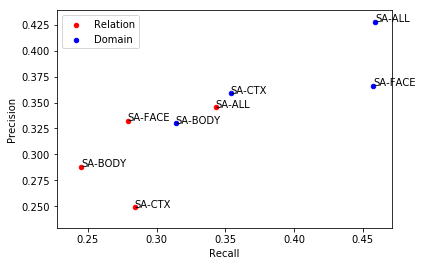

In [103]:
ax = results.iloc[:4].plot('Recall', 'Precision', kind='scatter', c='red', label='Relation')
results.iloc[4:].plot('Recall', 'Precision', kind='scatter', c='blue', ax=ax, label='Domain')

for i, point in results.iterrows():
    ax.text(point['Recall'], point['Precision'], str(point['Unnamed: 0'][4:]))

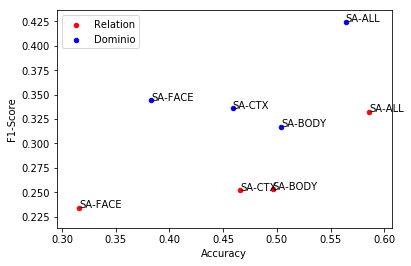

In [104]:
ax = results.iloc[:4].plot('Accuracy', 'F1-Score', kind='scatter', c='red', label='Relation')
results.iloc[4:].plot('Accuracy', 'F1-Score', kind='scatter', c='blue', ax=ax, label='Dominio')

for i, point in results.iterrows():
    ax.text(point['Accuracy'], point['F1-Score'], str(point['Unnamed: 0'][4:]))

In [109]:
results = pd.read_csv(os.path.join(BASE_DIR, 'results_per_class_domain_semantic_attributes.csv'))
results

,Domain,Precision,Recall,F1-Score,Support
0,Attachent,0.2500,0.1667,0.2000,12
1,Coalitional Group,0.6757,0.8065,0.7353,31
2,Heirarchical Power,0.3750,0.3158,0.3429,19
3,Mating,0.1250,0.4000,0.1905,5
4,Reciprocity,0.7143,0.6061,0.6557,66
5,Attachent,0.3000,0.2500,0.2727,12
6,Coalitional Group,0.4706,0.5161,0.4923,31
7,Heirarchical Power,0.2222,0.1053,0.1429,19
8,Mating,0.0000,0.0000,0.0000,5
9,Reciprocity,0.6571,0.6970,0.6765,66


Text(0,0.5,'F1-Score')

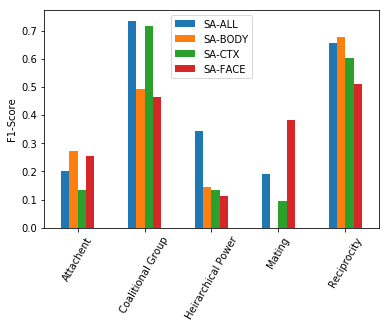

In [211]:
ax = pd.DataFrame(results['F1-Score'].values.reshape(4,-1).T, columns=['SA-ALL', 'SA-BODY', 'SA-CTX', 'SA-FACE']).plot(x=domains, kind='bar', rot=60)
ax.set_ylabel('F1-Score')

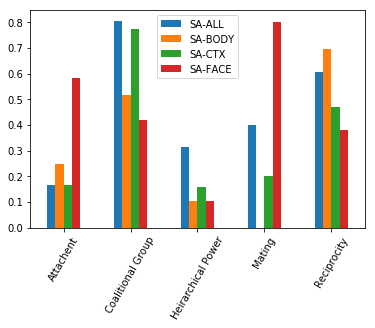

In [207]:
pd.DataFrame(results['Recall'].values.reshape(4,-1).T, columns=['SA-ALL', 'SA-BODY', 'SA-CTX', 'SA-FACE']).plot(x=domains, kind='bar', rot=60)

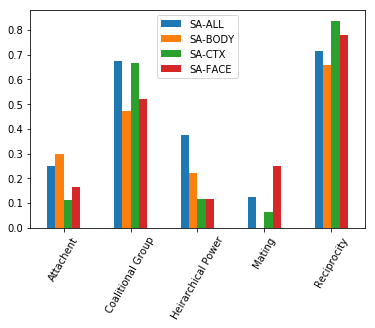

In [208]:
pd.DataFrame(results['Precision'].values.reshape(4,-1).T, columns=['SA-ALL', 'SA-BODY', 'SA-CTX', 'SA-FACE']).plot(x=domains, kind='bar', rot=60)